## 任务名称：基于多种经典深度学习架构的IMDB影评情感分析对比研究

TensorFlow版本: 2.20.0
加载IMDB数据集(小规模)...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
训练集: (25000, 100), 测试集: (25000, 100)

开始训练模型...

=== 训练 Light-LSTM 模型 ===


e:\电子资料\大三上\人工智能原理\experiment\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Light-LSTM 参数量: 168865
Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.7709 - loss: 0.4623 - val_accuracy: 0.8458 - val_loss: 0.3508
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8730 - loss: 0.3027 - val_accuracy: 0.8504 - val_loss: 0.3456
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8936 - loss: 0.2599 - val_accuracy: 0.8454 - val_loss: 0.3503
Light-LSTM - 准确率: 0.8476, F1: 0.8495, 时间: 31.07s

=== 训练 Light-GRU 模型 ===


e:\电子资料\大三上\人工智能原理\experiment\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Light-GRU 参数量: 166881
Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.7329 - loss: 0.4992 - val_accuracy: 0.8352 - val_loss: 0.3706
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8651 - loss: 0.3157 - val_accuracy: 0.8398 - val_loss: 0.3655
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.8896 - loss: 0.2650 - val_accuracy: 0.8356 - val_loss: 0.3644
Light-GRU - 准确率: 0.8379, F1: 0.8285, 时间: 46.31s

=== 训练 Simple-CNN 模型 ===


e:\电子资料\大三上\人工智能原理\experiment\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Simple-CNN 参数量: 165697
Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7025 - loss: 0.5554 - val_accuracy: 0.8166 - val_loss: 0.4055
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8599 - loss: 0.3317 - val_accuracy: 0.8440 - val_loss: 0.3437
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9200 - loss: 0.2152 - val_accuracy: 0.8536 - val_loss: 0.3457
Simple-CNN - 准确率: 0.8493, F1: 0.8489, 时间: 5.70s

模型性能对比:
     Model  Accuracy  F1-Score  Precision  Recall  Parameters  Training_Time(s)
Light-LSTM    0.8476    0.8495     0.8386  0.8607      168865           31.0675
 Light-GRU    0.8379    0.8285     0.8796  0.7830      166881           46.3149
Simple-CNN    0.8493    0.8489     0.8512  0.8465      165697            5.7008


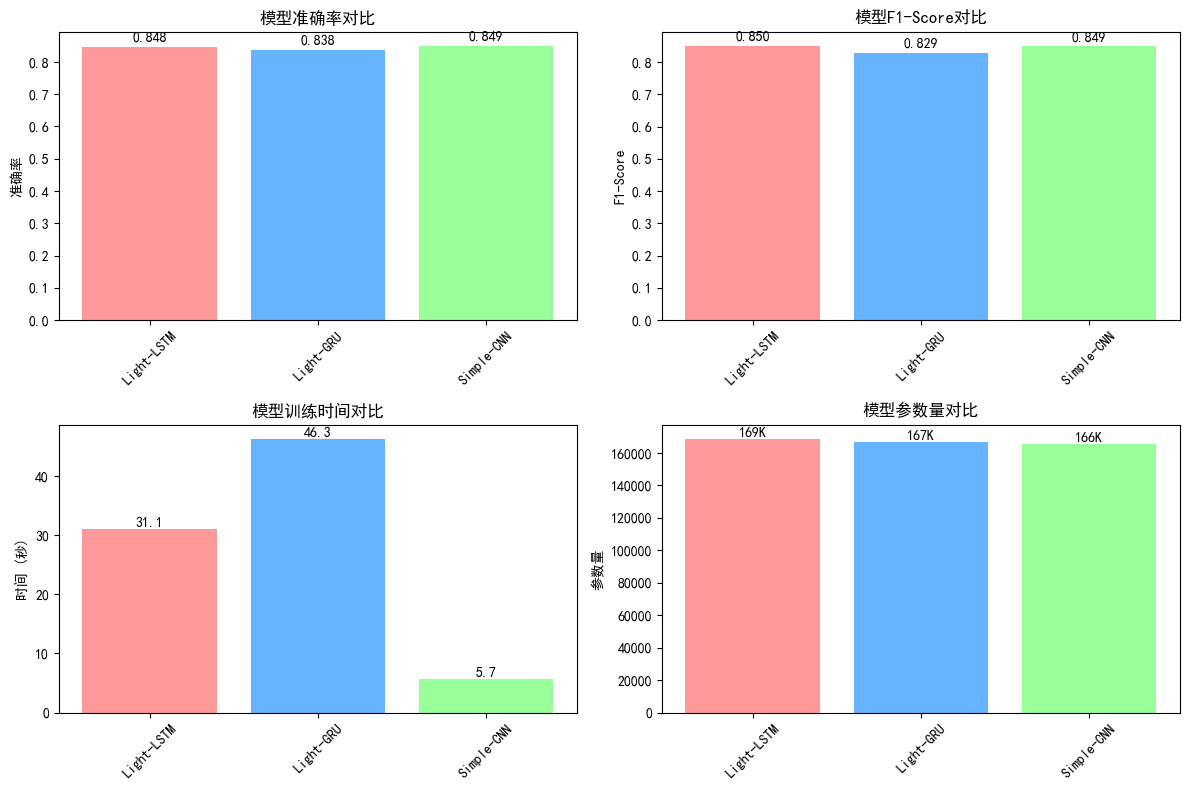


最佳模型: Simple-CNN
准确率: 0.8493
F1-Score: 0.8489
精确率: 0.8512
召回率: 0.8465
训练时间: 5.70秒

结果已保存到 'nlp_light_comparison.csv'

程序执行完成！


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
import gc
import time

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("TensorFlow版本:", tf.__version__)

print("加载IMDB数据集(小规模)...")
max_features = 5000  # 大幅减少词汇量
max_length = 100     # 减少序列长度

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_length)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_length)

print(f"训练集: {x_train.shape}, 测试集: {x_test.shape}")

def create_light_lstm():
    """LSTM模型"""
    model = models.Sequential([
        layers.Embedding(max_features, 32, input_length=max_length),
        layers.LSTM(32, return_sequences=False),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ], name='Light-LSTM')
    return model

def create_light_gru():
    """GRU模型"""
    model = models.Sequential([
        layers.Embedding(max_features, 32, input_length=max_length),
        layers.GRU(32, return_sequences=False),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ], name='Light-GRU')
    return model

def create_simple_cnn():
    """CNN模型"""
    model = models.Sequential([
        layers.Embedding(max_features, 32, input_length=max_length),
        layers.Conv1D(32, 5, activation='relu'),
        layers.GlobalMaxPooling1D(),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ], name='Simple-CNN')
    return model

def train_single_model(model_name, model_creator):
    """单独训练一个模型，减少内存占用"""
    print(f"\n=== 训练 {model_name} 模型 ===")
    
    # 创建模型
    model = model_creator()
    
    # 编译模型
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    # 构建模型（通过预测一个样本）
    _ = model.predict(x_train[:1], verbose=0)
    
    # 现在可以安全地获取参数数量
    params_count = model.count_params()
    print(f"{model_name} 参数量: {params_count}")
    
    # 训练模型
    start_time = time.time()
    history = model.fit(
        x_train, y_train,
        epochs=3,  # 减少训练轮数
        batch_size=64,  # 减小批大小
        validation_split=0.2,  # 使用验证分割而不是完整验证集
        verbose=1
    )
    training_time = time.time() - start_time
    
    # 评估模型
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    
    # 预测
    predictions = model.predict(x_test, verbose=0, batch_size=64)
    binary_predictions = (predictions > 0.5).astype(int).flatten()
    
    # 计算指标
    precision = precision_score(y_test, binary_predictions)
    recall = recall_score(y_test, binary_predictions)
    f1 = f1_score(y_test, binary_predictions)
    
    # 清理内存
    del predictions
    gc.collect()
    
    return {
        'model': model,
        'history': history.history,
        'metrics': {
            'accuracy': test_accuracy,
            'loss': test_loss,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'params': params_count,
            'training_time': training_time
        },
        'predictions': binary_predictions
    }

print("\n开始训练模型...")

# 定义模型列表
models_to_train = [
    ('Light-LSTM', create_light_lstm),
    ('Light-GRU', create_light_gru),
    ('Simple-CNN', create_simple_cnn)
]

# 逐个训练模型
results = {}
for model_name, model_creator in models_to_train:
    try:
        result = train_single_model(model_name, model_creator)
        results[model_name] = result
        
        # 打印当前模型结果
        metrics = result['metrics']
        print(f"{model_name} - 准确率: {metrics['accuracy']:.4f}, F1: {metrics['f1']:.4f}, 时间: {metrics['training_time']:.2f}s")
        
        # 清理上一个模型的内存（除了最后一个）
        if model_name != models_to_train[-1][0]:
            del result['model']
            gc.collect()
    except Exception as e:
        print(f"训练 {model_name} 时出错: {e}")
        continue

if results:
    print("\n" + "="*50)
    print("模型性能对比:")
    print("="*50)

    comparison_data = []
    for name, result in results.items():
        metrics = result['metrics']
        comparison_data.append({
            'Model': name,
            'Accuracy': metrics['accuracy'],
            'F1-Score': metrics['f1'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'Parameters': metrics['params'],
            'Training_Time(s)': metrics['training_time']
        })

    comparison_df = pd.DataFrame(comparison_data)
    print(comparison_df.round(4).to_string(index=False))

    try:
        # 只绘制一个简单的对比图
        plt.figure(figsize=(12, 8))
        
        # 准确率对比
        models_list = list(results.keys())
        accuracies = [results[name]['metrics']['accuracy'] for name in models_list]
        
        plt.subplot(2, 2, 1)
        bars = plt.bar(models_list, accuracies, color=['#ff9999', '#66b3ff', '#99ff99'])
        plt.title('模型准确率对比')
        plt.ylabel('准确率')
        plt.xticks(rotation=45)
        
        # 在柱状图上添加数值标签
        for bar, acc in zip(bars, accuracies):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{acc:.3f}', ha='center', va='bottom')
        
        # F1-score对比
        f1_scores = [results[name]['metrics']['f1'] for name in models_list]
        
        plt.subplot(2, 2, 2)
        bars = plt.bar(models_list, f1_scores, color=['#ff9999', '#66b3ff', '#99ff99'])
        plt.title('模型F1-Score对比')
        plt.ylabel('F1-Score')
        plt.xticks(rotation=45)
        
        # 在柱状图上添加数值标签
        for bar, f1 in zip(bars, f1_scores):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{f1:.3f}', ha='center', va='bottom')
        
        # 训练时间对比
        training_times = [results[name]['metrics']['training_time'] for name in models_list]
        
        plt.subplot(2, 2, 3)
        bars = plt.bar(models_list, training_times, color=['#ff9999', '#66b3ff', '#99ff99'])
        plt.title('模型训练时间对比')
        plt.ylabel('时间 (秒)')
        plt.xticks(rotation=45)
        
        # 在柱状图上添加数值标签
        for bar, time_val in zip(bars, training_times):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{time_val:.1f}', ha='center', va='bottom')
        
        # 参数量对比
        params = [results[name]['metrics']['params'] for name in models_list]
        
        plt.subplot(2, 2, 4)
        bars = plt.bar(models_list, params, color=['#ff9999', '#66b3ff', '#99ff99'])
        plt.title('模型参数量对比')
        plt.ylabel('参数量')
        plt.xticks(rotation=45)
        
        # 在柱状图上添加数值标签
        for bar, param in zip(bars, params):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{param/1000:.0f}K', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"可视化失败: {e}")
        print("跳过可视化部分...")

    if results:
        best_model_name = max(results.items(), key=lambda x: x[1]['metrics']['accuracy'])[0]
        best_metrics = results[best_model_name]['metrics']

        print(f"\n最佳模型: {best_model_name}")
        print(f"准确率: {best_metrics['accuracy']:.4f}")
        print(f"F1-Score: {best_metrics['f1']:.4f}")
        print(f"精确率: {best_metrics['precision']:.4f}")
        print(f"召回率: {best_metrics['recall']:.4f}")
        print(f"训练时间: {best_metrics['training_time']:.2f}秒")

    # 保存结果
    try:
        comparison_df.to_csv('nlp_light_comparison.csv', index=False)
        print("\n结果已保存到 'nlp_light_comparison.csv'")
    except:
        print("\n无法保存文件，但所有结果已在控制台显示")
else:
    print("\n没有模型成功训练，请检查错误信息")

# 最终内存清理
for name in list(results.keys()):
    if 'model' in results[name]: 
        del results[name]['model']
gc.collect()

print("\n程序执行完成！")